In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import re

In [8]:
# Read the file
df1 = pd.read_csv('C:/Users/e0979790/OneDrive - National University of Singapore/Module Materials/Year 4 Sem 2/DSA4262/Individual Assigment/Assignment 1/Dataset/Data 1.csv')
df2 = pd.read_csv('C:/Users/e0979790/OneDrive - National University of Singapore/Module Materials/Year 4 Sem 2/DSA4262/Individual Assigment/Assignment 1/Dataset/Data 2.csv')


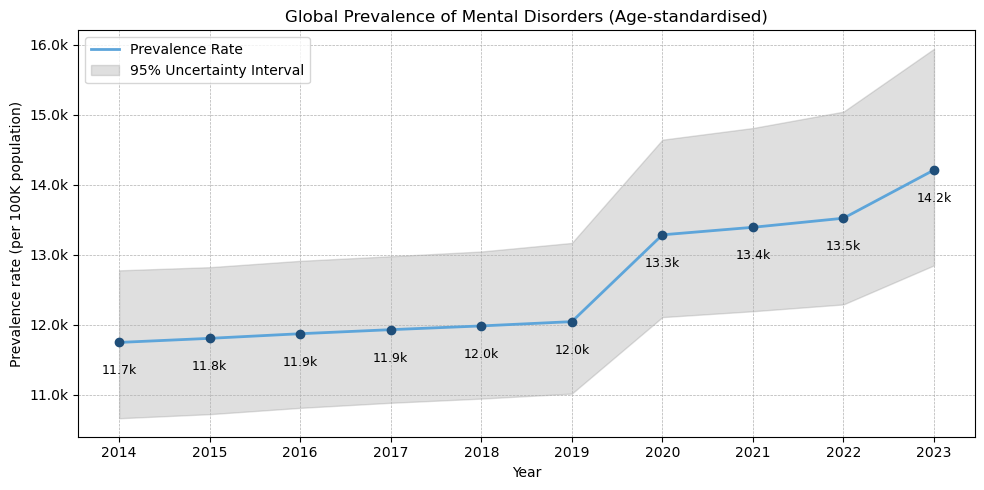

In [9]:
# Plot 1: Mental Disorder rates over the years
df1 = df1.rename(columns={
    "year": "year",
    "val": "value",
    "upper": "upper",
    "lower": "lower"
})
df1 = df1.sort_values("year")

# Main plot
plt.figure(figsize=(10, 5))

# Line 
plt.plot(
    df1["year"],
    df1["value"],
    linewidth=2,
    label="Prevalence Rate",
    color="#5DA5DA"   # soft blue
)

# Dots (slightly darker)
plt.scatter(
    df1["year"],
    df1["value"],
    zorder=3,
    color="#1F4E79"   # navy accent
)


# Confidence interval
plt.fill_between(
    df1["year"],
    df1["lower"],
    df1["upper"],
    alpha=0.25,
    label="95% Uncertainty Interval",
    color='gray'
)

# Value labels above dots
for _, row in df1.iterrows():
    plt.text(
        row["year"],
        row["value"] - 500,   # vertical offset 
        # divide by 1000 and 1dp
        f"{row['value']/1000:.1f}k",
        ha="center",
        va="bottom",
        fontsize=9
    )

# Labels & title
plt.xlabel("Year")
plt.xticks(df1["year"])
plt.ylabel("Prevalence rate (per 100K population)")
plt.title("Global Prevalence of Mental Disorders (Age-standardised)")
plt.legend()
plt.tight_layout()
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5)
plt.gca().yaxis.set_major_formatter(
    FuncFormatter(lambda x, _: f"{x/1000:.1f}k")
)
plt.show()


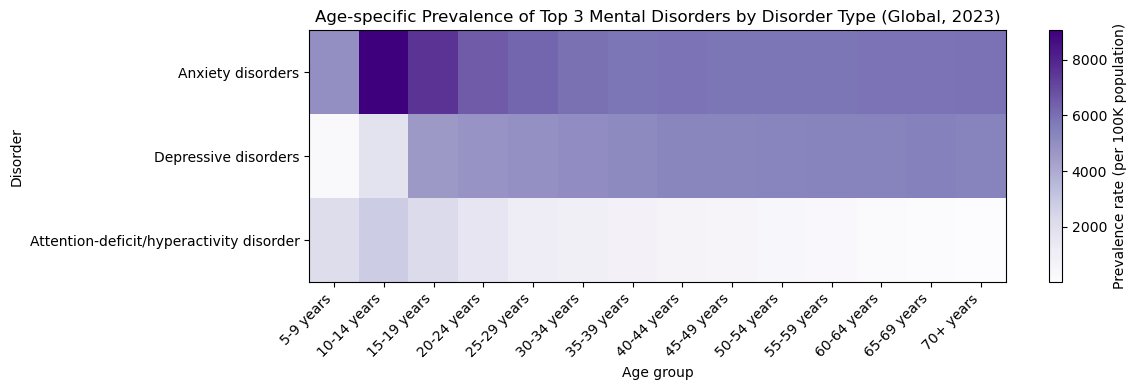

In [10]:
# Plot 2
# Drop <5 years
df2 = df2[df2["age_name"] != "<5 years"]
# Find top k disorders by total prevalence
k=3
# Exclude "Other mental disorders"
topk_disorders = (
    df2[df2["cause_name"] != "Other mental disorders"]
    .groupby("cause_name")["val"]
    .sum()
    .nlargest(k)
    .index
    .tolist()
)
# Filter to top k disorders only
heatmap_df = df2[df2["cause_name"].isin(topk_disorders[:k])].pivot(
    index="cause_name",
    columns="age_name",
    values="val"
)

# print(heatmap_df)

# Optional: sort age groups naturally if needed
def age_sort_key(s: str) -> int:
    # Extract the first integer in the label (e.g., "<5 years" -> 5, "70+ years" -> 70)
    m = re.search(r"\d+", str(s))
    return int(m.group()) if m else 999  # unknowns go to the end

heatmap_df = heatmap_df[sorted(heatmap_df.columns, key=age_sort_key)]
# sort heatmap by disorder prevalence sum descending
heatmap_df = heatmap_df.loc[
    heatmap_df.sum(axis=1).sort_values(ascending=False).index
]
# manually move <5 years to the front if needed
if "<5 years" in heatmap_df.columns:
    cols = heatmap_df.columns.tolist()
    cols.insert(0, cols.pop(cols.index("<5 years")))
    heatmap_df = heatmap_df[cols]

# ---- plot ----
plt.figure(figsize=(12, 4))

im = plt.imshow(
    heatmap_df.values,
    aspect="auto",
    cmap="Purples"
)

# Axis ticks
plt.xticks(
    ticks=np.arange(len(heatmap_df.columns)),
    labels=heatmap_df.columns,
    rotation=45,
    ha="right"
)

plt.yticks(
    ticks=np.arange(len(heatmap_df.index)),
    labels=heatmap_df.index
)

# Colorbar
cbar = plt.colorbar(im)
cbar.set_label("Prevalence rate (per 100K population)")


# Title & labels
plt.title(f"Age-specific Prevalence of Top {k} Mental Disorders by Disorder Type (Global, 2023)")
plt.xlabel("Age group")
plt.ylabel("Disorder")

plt.tight_layout()
plt.show()

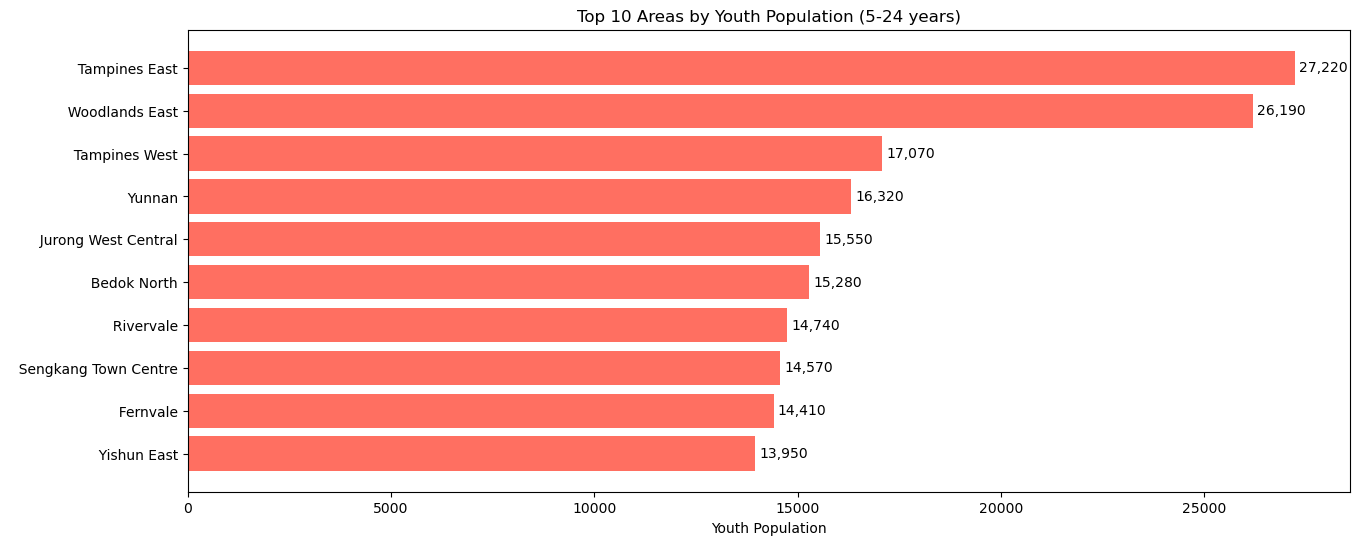

In [ ]:
# Plot 3

# Read Excel file (make sure you have the correct path)
df3 = pd.read_excel("C:/Users/e0979790/OneDrive - National University of Singapore/Module Materials/Year 4 Sem 2/DSA4262/Individual Assigment/Assignment 1/Dataset/Data 3.xlsx", skiprows=11)
# Keep first 6 columns
df3 = df3.iloc[:, :6]
# Remove 2nd column
df3 = df3.drop(df3.columns[1], axis=1)
# Convert all age group columns to numeric (will convert non-numeric to NaN)
df3.iloc[:, 1:] = df3.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
# Sum col 2 onwards into Youth Population
df3["Youth Population"] = df3.iloc[:, 1:].sum(axis=1)
df3["Youth Population"] = pd.to_numeric(df3["Youth Population"], errors='coerce')
# Rename first column to "Area"
df3 = df3.rename(columns={df3.columns[0]: "Area"})
# Drop other columnse except Area and Youth Population
df3 = df3[["Area", "Youth Population"]]
# Filter all rows with "Total" in Area
df3 = df3[~df3["Area"].str.contains("Total", case=False, na=False)]

N = 10
# Plot top 10 areas by Youth Population
top10_df = df3.nlargest(N, "Youth Population").sort_values("Youth Population")
plt.figure(figsize=(15, 6))
plt.barh(
    top10_df["Area"],
    top10_df["Youth Population"],
    color="#FF6F61"  # soft red
)
# Plot labels on bars
for index, value in enumerate(top10_df["Youth Population"]):
    plt.text(
        value + 100,  # slight offset to the right
        index,
        f"{value:,.0f}",
        va="center"
    )
# increase right margin
plt.xlabel("Youth Population")
plt.title(f"Top {N} Areas by Youth Population (5-24 years)")
plt.show()
